<a href="https://colab.research.google.com/github/bikash086-ctrl/MLnow_2.0/blob/main/Univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
cd'/content/drive/MyDrive/student/student'

/content/drive/MyDrive/student/student


In [96]:
ls

cleanedMathData.csv  student-merge.R     student.txt
student.gdoc         student-por.csv     Univariate_MathData_2.csv
student-mat.csv      student-por.gsheet


In [97]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
import os

In [98]:
MathData = pd.read_csv('student-mat.csv', sep=';') 

In [99]:
MathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [100]:
UniMathData = MathData[['G1', 'G3']]
UniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [101]:
UniMathData.to_csv('Univariate_MathData_2.csv')

In [102]:
ls

cleanedMathData.csv  student-merge.R     student.txt
student.gdoc         student-por.csv     Univariate_MathData_2.csv
student-mat.csv      student-por.gsheet


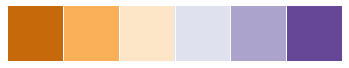

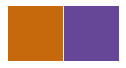

In [103]:
import seaborn as sns 
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr')
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))


In [104]:
UniMathData.columns

Index(['G1', 'G3'], dtype='object')

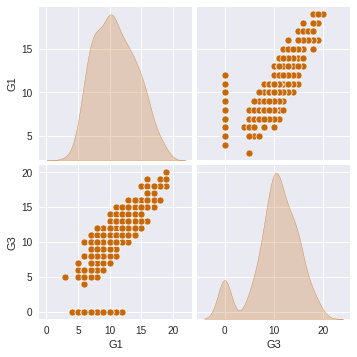

In [105]:
sns.pairplot(UniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [106]:
TrainDataset = UniMathData.sample(frac=0.8, random_state=0) 
TestDataset = UniMathData.drop(TrainDataset.index)

print(TrainDataset.head())
print(TestDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [107]:
print(TrainDataset.shape)
print(TestDataset.shape)

(316, 2)
(79, 2)


In [108]:
TrainFeatures = TrainDataset.copy()
TestFeatures = TestDataset.copy()

print(TrainFeatures.head())
print(TestFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [109]:
TrainLabels = TrainFeatures.pop('G3')
TestLabels = TestFeatures.pop('G3')

print(TrainLabels.head())
print(TestLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [110]:
print(TrainFeatures.head())
print(TestFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [111]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [112]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001), 
    metrics = ['mae', 'mse']
)

In [113]:
numEpochs = 300
history = model.fit(x = TrainFeatures, y = TrainLabels, validation_data = (TestFeatures, TestLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 17ms/step - loss: 16.8445 - mae: 16.8445 - mse: 322.8765 - val_loss: 17.7570 - val_mae: 17.7570 - val_mse: 356.7102
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 16.7271 - mae: 16.7271 - mse: 318.5729 - val_loss: 17.6326 - val_mae: 17.6326 - val_mse: 351.8968
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 16.6090 - mae: 16.6090 - mse: 314.2509 - val_loss: 17.5083 - val_mae: 17.5083 - val_mse: 347.1253
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 16.4926 - mae: 16.4926 - mse: 310.0892 - val_loss: 17.3834 - val_mae: 17.3834 - val_mse: 342.3616
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 16.3740 - mae: 16.3740 - mse: 305.7926 - val_loss: 17.2593 - val_mae: 17.2593 - val_mse: 337.6616
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 16.2567 - mae: 16.2567 - mse: 301.5741 - val_loss: 17.1348 - val_mae: 1

In [114]:
print(history)

In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


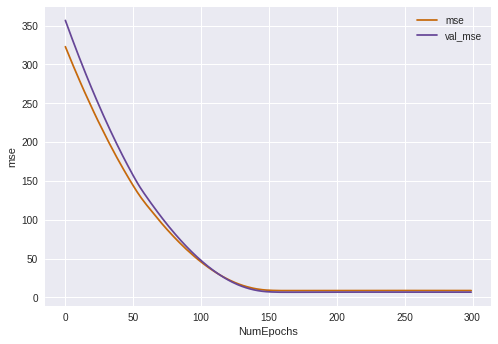

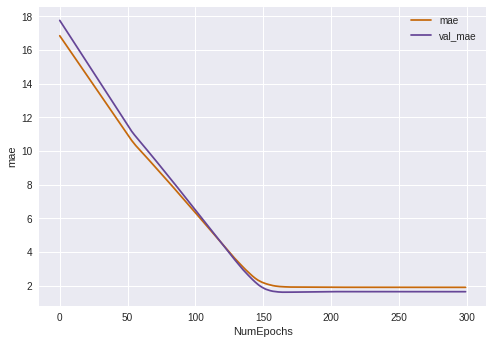

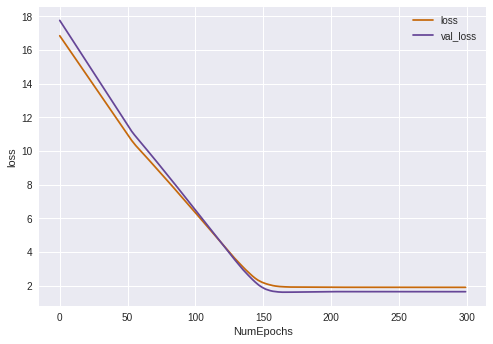

In [116]:
def CurvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


CurvePlots('mse')
CurvePlots('mae')
CurvePlots('loss')

In [117]:
model.predict([1])

array([[2.220025]], dtype=float32)

In [118]:
print(f'Prediction for input value 1: {model.predict([1])}')

TempListforPreds = [1,2,3,4,5]
print(f'''input List = {TempListforPreds}


List of Predictions:
{model.predict(TempListforPreds)}

List of Predictions (flattened out):
{model.predict(TempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.220025]]
input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.220025 ]
 [3.1090279]
 [3.9980302]
 [4.887033 ]
 [5.776036 ]]

List of Predictions (flattened out):
[2.220025  3.1090279 3.9980302 4.887033  5.776036 ]



In [119]:
print(TestFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [120]:
TestPreds = model.predict(TestFeatures).flatten()

In [121]:
print(len(TestPreds))
print(TestPreds)

79
[13.777058   6.665038  11.11005   16.444067  16.444067  11.999053
 13.777058  18.22207   18.22207    8.443043  13.777058  12.888056
  8.443043   7.5540404  9.332046  12.888056  11.11005   15.555063
  7.5540404 10.221048  14.66606   12.888056  13.777058  15.555063
  7.5540404  7.5540404  8.443043  10.221048  11.999053  10.221048
 11.999053  12.888056  10.221048   6.665038   9.332046  11.999053
  7.5540404  8.443043  13.777058   9.332046   9.332046   7.5540404
 11.999053   6.665038  12.888056   7.5540404  7.5540404 11.11005
 12.888056  16.444067  11.999053  14.66606    9.332046  11.999053
 14.66606   11.999053  14.66606   11.999053  14.66606   11.11005
 11.999053   8.443043  15.555063   7.5540404 15.555063  11.11005
 15.555063  12.888056   8.443043   8.443043  11.999053  17.333069
 12.888056  15.555063  10.221048   7.5540404 10.221048   7.5540404
 11.11005  ]


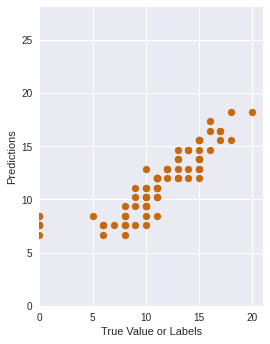

In [122]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(TestLabels, TestPreds)

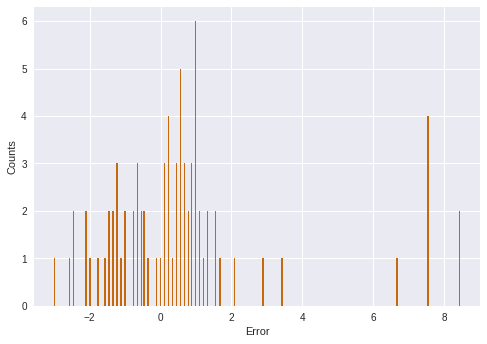

In [123]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(TestPreds, TestLabels, numEpochs)
